# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

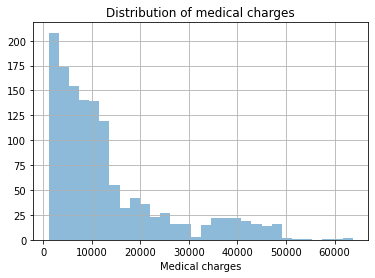

In [11]:
# Histogram of distribution of medical charges
medical['charges'].hist(alpha=0.5, bins=30)

plt.xlabel('Medical charges')
plt.title('Distribution of medical charges')
plt.show()

In [15]:
med_charges = medical['charges']
mean_charges = np.mean(med_charges)
print("Mean of medical charges: {:.4f}".format(mean_charges))

std_charges = np.std(med_charges)
print("STD of medical charges: {:.4f}".format(std_charges))

Mean of medical charges: 13270.4223
STD of medical charges: 12105.4850


The statistics above seem very appropriate given the context of the data. Medical charges tend to be very large. The data also appears skewed and seems to get thinner as the charge amount increases. This makes sense as the large amounts are expensive to most patients. These amounts are also usually handled by individuals with insurance especially the higher the amount increases. Therefore higher the amount of data or "n" the more the central limit theorem will apply and approach a normal distribution of the theoretical population. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Due to the fact that we have a large sample we can rely on the properties of the CLT to trust that the mean of this particular sample is close to the actal population mean. The 95% confidence interval would seem appropriate for this particular case using the Percent Point Function (PPF) of a t-distribution (with degrees of freedom equal to 1).

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [19]:
n = len(med_charges)
dof = n - 1
crit_val = t.ppf(0.95,dof)
crit_val

1.6459941145571317

In [26]:
confidence_interval = crit_val * (std_charges/np.sqrt(dof))
upper_limit = mean_charges + confidence_interval
lower_limit = mean_charges - confidence_interval
print("Confidence interval: {}".format(confidence_interval))
print("Upper limit: {}".format(upper_limit))
print("Lower limit: {}".format(lower_limit))

Confidence interval: 544.9350813250251
Upper limit: 13815.357346466282
Lower limit: 12725.48718381623


In [24]:
# interval check
t.interval(0.05, dof, loc=mean_charges, scale=std_charges)

(12511.183795061812, 14029.660735220701)

A one sided interval is needed as displayed above and shows the average charge at 95% confidence interval comes to $12,511.18 for the lower limit which makes it highly unlikely that the avg charge has fallen below 12,000.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__

The assumptions we make by using the pooled standard deviation of the two groups is that they share the same std deviation.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [39]:
# The insured charges or n0 are the null hypothesis 
insured_charges = medical.charges.loc[medical.insuranceclaim == 1]

# Length of sample size of null hypothesis
n_0 = len(insured_charges)

# Mean of null hypothesis
x_0 = insured_charges.mean()

# Standard devation of null hypothesis
std_0 = insured_charges.std()

print('Insured Claim Calculations (null hypothesis, n0)')
print(f'Length of insured claims:  {n_0}')
print(f'Mean of insured claims: $ {x_0:.2f}')
print(f'Std of insured claims: $ {std_0:.2f}')

Insured Claim Calculations (null hypothesis, n0)
Length of insured claims:  783
Mean of insured claims: $ 16423.93
Std of insured claims: $ 14045.93


In [38]:
# The uninsured charges or n1 area the alternative hypothesis
uninsured_charges = medical.charges.loc[medical.insuranceclaim == 0]

# Length of sample size of alternative hypothesis
n_1 = len(uninsured_charges)

# Mean of alternative hypothesis
x_1 = uninsured_charges.mean()

# Standard devation of alternative hypothesis
std_1 = uninsured_charges.std()

print('Non-Insured Claim Calculations (alternative hypothesis, n_1)')
print(f'Length of non-insured claims: {n_1}')
print(f'Mean of non-insured claims: $ {x_1:.2f}')
print(f'Std of non-insured claims: $ {std_1:.2f}')

Non-Insured Claim Calculations (alternative hypothesis, n_1)
Length of non-insured claims: 555
Mean of non-insured claims: $ 8821.42
Std of non-insured claims: $ 6446.51


In [40]:
t_test = np.sqrt(((n_0 - 1) * std_0 ** 2 + (n_1 - 1) * std_1 ** 2) / (n_0 + n_1 - 2))
t_score = (x_0 - x_1) / t_test / np.sqrt(1 / n_0 + 1 / n_1)

print(f'Pooled Standard Deviation: $ {t_test:.2f}')
print(f't-test stat: $ {t_score:.2f}')

Pooled Standard Deviation: $ 11520.03
t-test stat: $ 11.89


In [34]:
p_value = (1 - t(n_0+ n_1 - 1).cdf(t_score)) * 2
p_value

0.0

In [43]:
# Formula Calculation from scipy.stats
ttest_ind(insured_charges, uninsured_charges)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

The sample size is small and hence z test is not possible and there's no method to conduct z test in scipy.stats.

In [44]:
ttest_ind(insured_charges, uninsured_charges, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test